<a href="https://colab.research.google.com/github/YunusKaratepe/duygu-tanima/blob/main/ClassificationReport_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['[18  1  2  1  0  0  0  0]', '[ 1 30  0  2  0  0  1  0]', '[ 1  0 27  4  2  4  0  6]', '[ 2  6  6 18  0  4  6  1]', '[ 0  2  3  0 28  0  1  4]', '[ 0  0  2  5  3 21  0  2]', '[ 3  1  1  1  0  0 31  1]', '[ 1  0  1  1  4  1  2 26]']
[[[18, 1, 2, 1, 0, 0, 0, 0], [1, 30, 0, 2, 0, 0, 1, 0], [1, 0, 27, 4, 2, 4, 0, 6], [2, 6, 6, 18, 0, 4, 6, 1], [0, 2, 3, 0, 28, 0, 1, 4], [0, 0, 2, 5, 3, 21, 0, 2], [3, 1, 1, 1, 0, 0, 31, 1], [1, 0, 1, 1, 4, 1, 2, 26]], [[11, 3, 0, 1, 1, 1, 1, 1], [2, 30, 0, 5, 0, 0, 0, 0], [3, 1, 16, 1, 6, 3, 2, 5], [2, 6, 3, 18, 1, 1, 1, 5], [1, 0, 1, 1, 27, 1, 2, 8], [1, 2, 6, 2, 1, 24, 1, 6], [0, 1, 4, 1, 2, 1, 23, 5], [0, 0, 1, 3, 2, 1, 2, 28]], [[17, 2, 1, 1, 0, 0, 1, 1], [3, 28, 1, 1, 0, 0, 1, 0], [1, 2, 22, 1, 3, 1, 1, 10], [1, 8, 6, 17, 0, 4, 0, 0], [0, 0, 1, 1, 42, 0, 3, 1], [0, 3, 6, 4, 1, 21, 1, 0], [2, 1, 1, 2, 1, 2, 27, 0], [0, 0, 1, 2, 0, 2, 1, 28]]]
[[46  6  3  3  1  1  2  2]
 [ 6 88  1  8  0  0  2  0]
 [ 5  3 65  6 11  8  3 21]
 [ 5 20 15 53  1  9  7  6]
 [ 

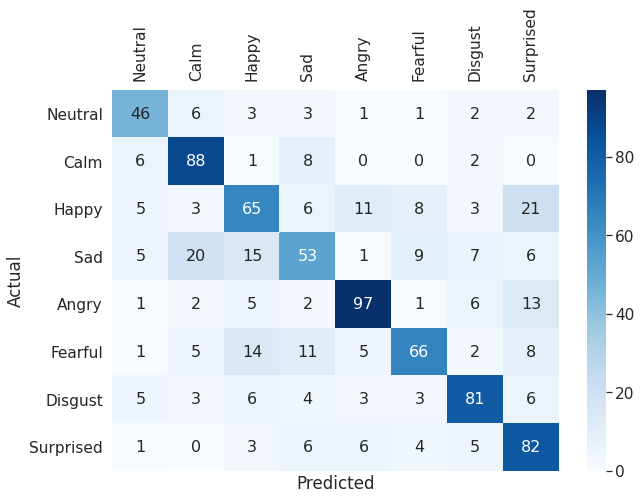

---------------------------------------------

Classification Report

              precision    recall  f1-score   support

     Neutral       0.66      0.72      0.69        64
        Calm       0.69      0.84      0.76       105
       Happy       0.58      0.53      0.56       122
         Sad       0.57      0.46      0.51       116
       Angry       0.78      0.76      0.77       127
     Fearful       0.72      0.59      0.65       112
     Disgust       0.75      0.73      0.74       111
   Surprised       0.59      0.77      0.67       107

    accuracy                           0.67       864
   macro avg       0.67      0.67      0.67       864
weighted avg       0.67      0.67      0.67       864



In [57]:
import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn





sentimentClasses = ['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Surprised']

matrixStr1 ="""[19  0  0  1  0  1  0  1]
 [ 1 33  0  0  0  0  0  0]
 [ 4  0 20  6  4  3  0  7]
 [ 5 10  2 15  1  3  5  2]
 [ 0  2  2  0 28  0  2  4]
 [ 2  1  0  8  2 20  0  0]
 [ 3  3  0  2  1  0 28  1]
 [ 0  1  1  1  3  2  2 26]"""


matrixStr2 = """[11  7  0  0  0  1  0  0]
 [ 2 32  0  3  0  0  0  0]
 [ 2  2 20  0  5  2  2  4]
 [ 1  7  3 18  1  2  2  3]
 [ 0  1  2  2 30  0  1  5]
 [ 1  2  8  3  0 25  0  4]
 [ 0  1  4  1  3  0 24  4]
 [ 0  0  1  2  0  2  1 31]"""

matrixStr3 = """[13  7  0  2  0  0  0  1]
 [ 2 30  1  1  0  0  0  0]
 [ 3  1 16  1  4  1  3 12]
 [ 1  8  3 18  2  1  2  1]
 [ 0  1  2  1 39  0  2  3]
 [ 0  3  3  3  2 24  1  0]
 [ 2  2  0  1  2  1 28  0]
 [ 2  0  0  1  0  2  1 28]"""
 

matrixStrArr = []
matrixStrArr.append(matrixStr1)
matrixStrArr.append(matrixStr2)
matrixStrArr.append(matrixStr3)


arr =matrixStr1.split("\n ")
print(arr)


confMatrixArr = [[], [], []]

counter = 0
for arrelement in matrixStrArr:
  arr = arrelement.split("\n ")
  for line in arr:
    line = line[1:-1]

    line = line.replace(" ", "  ")
    line = line.split("  ")


    splittedLine = []
    for element in line:
      if element != '':
        splittedLine.append(int(element))

    confMatrixArr[counter].append(splittedLine)

  counter += 1



#dikey: predicted  - yatay: true label
print(confMatrixArr)


newConfMat = []
for i in range(8):
  newConfMat.append([0, 0, 0, 0, 0, 0, 0, 0])

newConfMat = np.array(newConfMat) 

for mat in confMatrixArr:
  mat = np.array(mat)    
  newConfMat = np.add(mat, newConfMat)


print(newConfMat)




yPred = []
yTrue = []

for i in range(8):
  for j in range(8):

    for k in range(newConfMat[i][j]):
      yTrue.append(i + 1)

for i in range(8):
  for j in range(8):
    for k in range(newConfMat[i][j]):
      yPred.append(j + 1)








print(arr)
print("---------------------------------------------")
print(newConfMat)
#print((arr==newConfMat).all())


# data = {'y_Actual':    yTrue,
#         'y_Predicted': yPred
#         }


# df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
# confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], columns=sentimentClasses)

# sn.heatmap(confusion_matrix, annot=True)
# plt.show()

df_cm = pd.DataFrame(newConfMat, columns=sentimentClasses, index = sentimentClasses)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
    
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 16})# font size
plt.show()




print("---------------------------------------------")
print('\nClassification Report\n')
report = classification_report(yTrue, yPred, target_names = sentimentClasses)
print(report)










In [ ]:

# arr = confMatrixArr[0]
# arr = np.array(arr)

# yPred = []
# yTrue = []

# for i in range(8):
#   for j in range(8):
#     for k in range(arr[i][j]):
#       yTrue.append(i + 1)

# for i in range(8):
#   for j in range(8):
#     for k in range(arr[i][j]):
#       yPred.append(j + 1)

      


# print()
# print('yPred:')
# print('Length: ' + str(len(yPred)))
# print(yPred)

# print("---------------------------------------------")

# print('yTrue: ')
# print('Length: ' + str(len(yTrue)))
# print(yTrue)

# newConfMat = confusion_matrix(yTrue, yPred)


# print(arr)
# print("---------------------------------------------")
# print(newConfMat)
# #print((arr==newConfMat).all())


# print("---------------------------------------------")
# print('\nClassification Report\n')
# report = classification_report(yTrue, yPred, target_names = sentimentClasses)
# print(report)





















# TP = 0
# FP = 0
# TN = 0
# FN = 0


# FP = arr.sum(axis=0) - np.diag(arr)  
# FN = arr.sum(axis=1) - np.diag(arr)
# TP = np.diag(arr)
# TN = arr.sum() - (FP + FN + TP)

# FP = FP.astype(float)
# FN = FN.astype(float)
# TP = TP.astype(float)
# TN = TN.astype(float)


# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/(TP+FN)
# # Specificity or true negative rate
# TNR = TN/(TN+FP) 
# # Precision or positive predictive value
# PPV = TP/(TP+FP)
# # Negative predictive value
# NPV = TN/(TN+FN)
# # Fall out or false positive rate
# FPR = FP/(FP+TN)
# # False negative rate
# FNR = FN/(TP+FN)
# # False discovery rate
# FDR = FP/(TP+FP)
# # Overall accuracy
# ACC = (TP+TN)/(TP+FP+FN+TN)


